# COSC2753 - Assignment 2: Task 2 - RMIT University
**Paddy Variety Classification - CNN Basic**




In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [8]:
# Directory structure 
train_dir = '../data/train_images'
test_dir = '../data/test_images'

# Check class folders in train_images
class_names = sorted(os.listdir(train_dir))
print("Class folders detected:", class_names)


Class folders detected: ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [9]:
# Image dimensions and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 8330 images belonging to 10 classes.
Found 2077 images belonging to 10 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 95s 359ms/step - accuracy: 0.1799 - loss: 2.3895 - val_accuracy: 0.3741 - val_loss: 1.8479
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 96s 368ms/step - accuracy: 0.4330 - loss: 1.6707 - val_accuracy: 0.5566 - val_loss: 1.3448
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 99s 380ms/step - accuracy: 0.6097 - loss: 1.1588 - val_accuracy: 0.6553 - val_loss: 1.1084
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 105s 401ms/step - accuracy: 0.7544 - loss: 0.7520 - val_accuracy: 0.7333 - val_loss: 0.9367
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 111s 426ms/step - accuracy: 0.8342 - loss: 0.5024 - val_accuracy: 0.7814 - val_loss: 0.8798
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 120s 459ms/step - accuracy: 0.8854 - loss: 0.3324 - val_accuracy: 0.7694 - val_loss: 0.9071
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 121s 464ms/step - accuracy: 0.9195 - loss: 0.2318 - val_accuracy: 0.7853 - val_loss: 1.0651


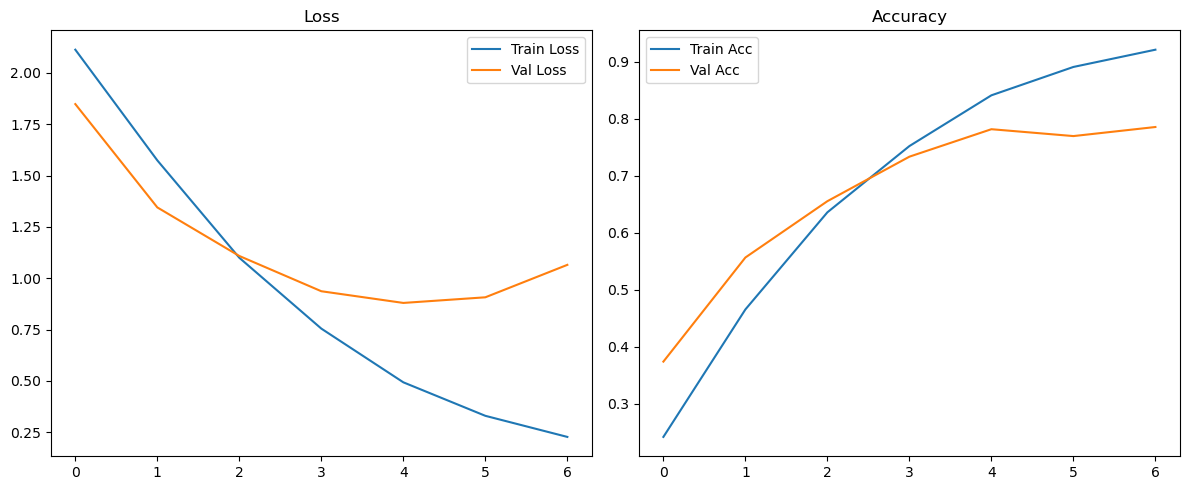

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()
